# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [영상처리를 위한 딥러닝4](#영상처리를-위한-딥러닝4)
  * [Convolutional Neural Network](#Convolutional-Neural-Network)
      * [FCNN](#FCNN)
      * [CNN](#CNN)
          * [CNN Architecture](#CNN-Architecture)
          * [CNN 특징](#CNN-특징)
  * [CNN구현](#CNN구현)
      * [흑백 이미지: mnist](#흑백-이미지)
      * [색상 이미지: cifar10](#색상-이미지)

---
 softmax 문제점
 logit
from_logits

이미지 로드 
utils
pathlib

keras.preprocessing을 사용하여 로드  
 image_dataset_from_directory
 
layers.experimental.preprocessing
Rescaling

- 데이터 shape 정하는것 외에는 큰 차이 없음
   - 흑백 : (28,28)
   - 색상 : (32,32,1)

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


### output layer  
- softmax : 실수값을 확률처럼 0~1 사이의 값으로 변경해주는 것이므로 없어도 가능
  - activation 차원 변형,공간 왜곡하는데 이에 따라 output layer 의 node갯수 상이
      - regression : 1개
      - binary classification :1개
        - sigmoid
      - classification: 클래스 갯수n
        - softmax :사람이 이해하기 좋은 포맷으로 나옴(optional)

### softmax 문제점
- 아주 드문 경우지만 성능에 영향을 주는 경우가 있음 
- 확률적으로 바꾸면서 값들의 범위에 따라서 값이 일정부분 잘려서 날라가는 경우 (clipping) 값이 다르게 나오는 경우가 생기게 되면서
- numerical stability 문제 

### logit
- numerical stability 문제 해결책
      > - 통계: logistic regression 연관
      > - DL 에서의 로지트(logit)
        -  [머신러닝 단기 집중 과정 머신러닝 용어집](https://developers.google.com/machine-learning/glossary?hl=ko):  분류 모델에서 생성되는 **원시(정규화되지 않음) 예측 벡터**로, 대개는 **정규화 함수**로 전달됩니다. 모델에서 다중 클래스 분류 문제를 해결하고 있는 경우 로지트는 **소프트맥스 함수의 입력**으로 사용되는 것이 일반적입니다. 그런 다음 소프트맥스 함수에서 가능한 클래스별로 하나의 값을 갖는 (정규화된) 확률 벡터를 생성합니다.     또한 로지트는 시그모이드 함수의 요소별 역을 지칭할 때도 있습니다. 자세한 내용은 tf.nn.sigmoid_cross_entropy_with_logits를 참조하세요.

-  clipping 되지않게 조절

In [3]:
#1)from_logits=False
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(10))  #classification softmax 없음 -> 실수 범위

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.4620 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_ac

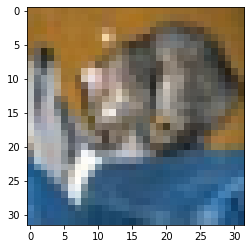

In [4]:
plt.imshow(test_images[0])

In [5]:
t= model.predict(test_images[0][tf.newaxis])
t

array([[-0.48094845, -0.16623126, -0.34321326, -0.22778687, -0.05512214,
        -0.2992004 , -0.11757313, -0.17994906, -0.09051366, -0.11177629]],
      dtype=float32)

In [6]:
np.sum(t)   #softmax없으므로 합이 1이 아님

-2.0723145

In [8]:
np.argmax(t)  #3인데 완전히 다르게 예측

4

In [9]:
#softmax , from_logits=False
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax') )

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5058 - accuracy: 0.4514 - val_loss: 1.2697 - val_accuracy: 0.5376
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1522 - accuracy: 0.5914 - val_loss: 1.1057 - val_accuracy: 0.6115
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0106 - accuracy: 0.6459 - val_loss: 1.1020 - val_accuracy: 0.6212
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9163 - accuracy: 0.6781 - val_loss: 0.9479 - val_accuracy: 0.6690
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8441 - accuracy: 0.7035 - val_loss: 0.9597 - val_accuracy: 0.6729
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7962 - accuracy: 0.7215 - val_loss: 0.9352 - val_accuracy: 0.6818
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7419 - accuracy: 0.7392 - val_loss: 0.9026 - val_ac

In [10]:
t= model.predict(test_images[0][tf.newaxis])
t   #softmax로 총 합 1

array([[5.9381872e-04, 5.3316262e-04, 4.2588323e-02, 8.0087024e-01,
        3.9599263e-03, 1.0307375e-01, 3.3552289e-02, 3.6989027e-03,
        7.6030148e-03, 3.5265370e-03]], dtype=float32)

In [11]:
test_labels[0] # 정답

array([3], dtype=uint8)

In [12]:
np.argmax(t) #값을 비슷하게 맞춤

3

In [16]:
test_labels[0]

array([3], dtype=uint8)

---
## from_logits
- paramter에 객체방식으로 default 값 변경 가능
   - `SparseCategoricalCrossentropy(from_logits=False )` (기본값)
>	Whether y_pred is expected to be a logits tensor. **By default, we assume that y_pred encodes a probability distribution.**
 Note - Using from_logits=True may be more **numerically stable.**
  - 참고: https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
  
- clipping 입력값에 따라서 출력 값이 다르며 이상하게 나오는 문제 때문에 해당 문제를 줄여줌 
    - softmax 들어가기 직전에 변하지 않은 값들로 clippidng현상에서 변환할때 문제가 일어날수 있는 경우를 줄여줌
- 드문 경우에 속도가 느리고 이런 경우가 드문 현상이기 때문에 default 아님
- 학습할때  그래프 그려보면 loss 줄어드는 데 결과가 너무 작으면 softamx에 의해 문제가 생기는 경우가 있을수 있음을 알고 tf의 logit으로 해결
- softmax 쓰면 사람이 이해하기 좋으나 overflow 문제로 성능 체크 그래프를 그려봄 


In [19]:
#from_logits=True -> 훨씬더 안정적
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # softmax처럼 해줌 //총합은 1 아님
              metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5631 - accuracy: 0.4268 - val_loss: 1.2916 - val_accuracy: 0.5355
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1709 - accuracy: 0.5849 - val_loss: 1.0911 - val_accuracy: 0.6128
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0213 - accuracy: 0.6397 - val_loss: 1.0227 - val_accuracy: 0.6345
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9257 - accuracy: 0.6720 - val_loss: 1.0226 - val_accuracy: 0.6335
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8640 - accuracy: 0.6944 - val_loss: 0.9169 - val_accuracy: 0.6801
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8138 - accuracy: 0.7128 - val_loss: 0.8726 - val_accuracy: 0.6966
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7687 - accuracy: 0.7309 - val_loss: 0.8520 - val_ac

313/313 - 1s - loss: 0.8742 - accuracy: 0.7021


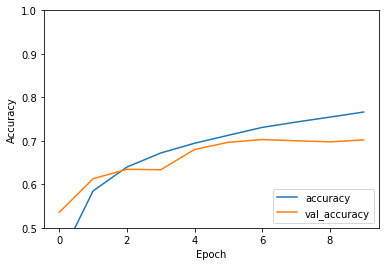

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Learning Curve
- 모델 평가: 
    - 과적합 val accuracy < accuracy & 성능 0.8 미만  

In [21]:
t= model.predict(test_images[0][tf.newaxis])
t  

array([[ 0.79792774, -3.6666436 , -1.415417  ,  4.608992  , -2.9572039 ,
         4.263908  , -0.0128167 , -0.8148837 , -3.4717917 , -2.0441554 ]],
      dtype=float32)

In [22]:
test_labels[0]

array([3], dtype=uint8)

In [23]:
np.sum(t)# softmax처럼 해줌 //총합은 1 아님

-4.712084

In [24]:
np.argmax(t) #비슷하게 맞

3

In [13]:
#4) softmax, from_logits=True -> 훨씬 더 안정적
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax') )

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.1231 - accuracy: 0.3284 - val_loss: 2.0601 - val_accuracy: 0.3950
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0139 - accuracy: 0.4425 - val_loss: 1.9990 - val_accuracy: 0.4585
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.9583 - accuracy: 0.4989 - val_loss: 1.9483 - val_accuracy: 0.5097
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9188 - accuracy: 0.5391 - val_loss: 1.9174 - val_accuracy: 0.5418
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8993 - accuracy: 0.5589 - val_loss: 1.9085 - val_accuracy: 0.5482
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8793 - accuracy: 0.5785 - val_loss: 1.8844 - val_accuracy: 0.5723
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8637 - accuracy: 0.5944 - val_loss: 1.8691 - val_ac

In [14]:
t= model.predict(test_images[0][tf.newaxis])
t  

array([[8.88646726e-11, 3.16852020e-14, 2.80301869e-02, 9.71811056e-01,
        5.44250838e-07, 2.76794981e-05, 6.60677324e-05, 1.09066154e-17,
        6.43802778e-05, 2.22910301e-10]], dtype=float32)

In [15]:
np.sum(t)

0.9999999

In [16]:
test_labels[0] #맞춤

array([3], dtype=uint8)

In [17]:
np.argmax(t)  #정답

3

### overflow
- softmax 의 또 다른 문제점
- 입력값에대해서 출력이 나와야되는데 원하는 결과값이 안나오는 경우가 있음 

softmax 구현

In [25]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

In [26]:
t=softmax([1,2,3])
t

1.0

In [ ]:
np.sum(t)

In [27]:
s=softmax([1000,1010,990])
s          #Overflow : 큰수를 넣으며 RuntimeWarning(numerically unstable)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [28]:
def softmax2(x):
  c=np.max(x)             #최대값
  exp_a = np.exp(x-c)     #최대값으로 뺌
  sum_exp_a =np.sum(exp_a)
  return exp_a/sum_exp_a

In [29]:
softmax2([1000,1010,990]) #변환에 문제없음

array([4.53978686e-05, 9.99954600e-01, 2.06106005e-09])

### Numerical Stabitliy 문제 
- 입력값에 따라서 원하는 결과값이  제대로 안나오는 경우
-  값이 너무 커지거나 작아지면서 하단과 같은 문제가 생김
 - 변활할때 생기는 오차와 이론적인 오차
    - gradient explding
    - gradient vanishing
        - batch normalization, 쟈비에르 initialize 에서 다룰 예정 

---
이미지 분류
1. 데이터 이해
  - EDA
  - 구성 이해
2. build an input pipeline
3. 모델 생성
4. 학습
5. 검정
6. 모델 향상을 위한 과정 반복

### 이미지 로드 
- **invaraiance하게 만드는 전처리** 필요

이미지 분류 참고: https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

### tensorflow.keras.preprocessing.image
- PIL 기반
- invariance하게 만들기 위해서 필요한 기능 제공

#### ImageDataGenerator
- data augmentation(증강)
- python의 generator: `next`

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #데이터 augmentation

### utils
- getfile : 인터넷에서파일 가져오는데 kerasd에 저장되어 2번 실행되면 cache에서 가져옴
- to_categorical : one-hot encoding
- plot_model :graph

---
python 3.3 부터 os모듈에 path처리하는 서브모듈
- platform dependent (시스테별 호화 안 됨)

### pathlib
- 데이터 구축이 제일 중요하고 어려움
    - Library Reference > File and Directory Access 
        - `pathlib`에서 다양한 기능 제공하지만 glob 정규식 이용해서 패턴 찾음
        - 데이터 양이 많으면 수동으로 하기 힘듦
        
- 전략
     - pandas DataFrame으로 관리
        - 데이터 양 100만개  
        - 파일 위치, 클래스, 설명, timestamp 등 편하게 관리
        - 전처리, EDA 용이
     - directory 관리

In [34]:
from tensorflow.keras.utils import to_categorical, plot_model, get_file  

In [33]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)  #  온라인 데이터에서 가져옴
data_dir = pathlib.Path(data_dir)  #객체지향방식

228818944/228813984 [==============================] - 2s 0us/step


꽃 데이터 세트 다운로드 
총 3670개의 flowers_photos 데이터 세트에는 클래스 당 하나씩 5 개의 하위 디렉토리가 있음


-  daisy/
-  dandelion/
-  roses/
- sunflowers/
- tulips/


In [35]:
data_dir  #저장된 path 

PosixPath('/root/.keras/datasets/flower_photos')

In [36]:
dir(data_dir) #glob 특정 패턴 기반으로 찾음 , state 

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_closed',
 '_cparts',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raise_closed',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_reserved',
 'is_socket',
 

In [37]:
data_dir.glob('*.jpg') #generator: next 하나씩 , list 전체 ,for 사용 가능 

<generator object Path.glob at 0x7f089070f5c8>

In [38]:
list(data_dir.glob('*.jpg')) #파일 내부에 각 클래스별로 나누어져 있음을 알 수 있음

[]

파일 내에 jpg로 끝나는 모든것 

In [39]:
 list(data_dir.glob('*/*.jpg')) # 

[PosixPath('/root/.keras/datasets/flower_photos/tulips/14067456066_87e15792d0.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/2322670828_34115a7050.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/7166644048_b00a14f01b.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/13900235284_32ce563633_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/14044685976_0064faed21.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/13539384593_23449f7332_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/8908097235_c3e746d36e_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/4644110077_ff252cd7c4.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/7145978709_2d1596f462.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/13472387874_d844478dbb.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/7166564830_8b34a3fd35_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/43534192

In [40]:
len( list(data_dir.glob('*/*.jpg')) )

3670

In [41]:
x=list(data_dir.glob('daisy/*.jpg')) #daisy 폴더에 633개 이미지
len( list(data_dir.glob('daisy/*.jpg'))) 

In [42]:
from PIL import Image

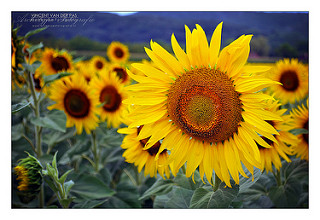

In [43]:
Image.open('/root/.keras/datasets/flower_photos/sunflowers/3749090865_b90f28a585_n.jpg')

str 안붙여도 가능
> duck typing
  문자열에서 객체로 넣어도 객체에서 원하는 기능만 있으면 실행  

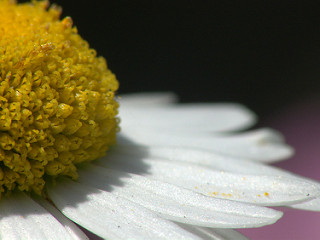

In [44]:
Image.open(str(x[0]))  

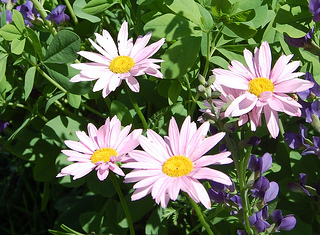

In [45]:
Image.open(x[10])  # str 없어도 가능 <duck typing>  ;  size 상이

### keras.preprocessing을 사용하여 로드  
- 기본적인 컨볼루션 사용가능 할까?
- 이미지 크기 상이
  - resize, crop 
  - 데이터가 많으면 각 사진마다 할 수가 없어서 ML 이용해서 크기 맞출 수도 있음 (ML에서는 결측치 처리와 비슷함)
#### image_dataset_from_directory
- directory에서 이미지 데이터 세트를 만듦
    - 기본값 rgb로 256x256크기로 bach 32size
- `image_dataset_from_directory(labels= label mode= 숫자?, class_names =[],subset='training' or'validation, size )`

In [ ]:
from keras.preprocessing.image    #image안이 아닌 preprocessing에도 있음

In [47]:
from keras.preprocessing import image_dataset_from_directory #directory에서 이미지 데이터 세트를 만듦

In [48]:
train_data=image_dataset_from_directory(data_dir, image_size=(180,180)) #BatchDataset (256, 256, 3)
train_data

Found 3670 files belonging to 5 classes.


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [49]:
dir(train_data)   # class_names

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependen

In [50]:
train_data.class_names  #dir기반으로 class 이름 자동으로 뽑음 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [51]:
dir(train_data) # __iter__ -> iterable  ,for 사용가능,iterator만들기 가능

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependen

In [52]:
x= iter(train_data)

In [53]:
next(x) #(32,180,180,3)    ->  len techniuqe ->unpacking 

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
 array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    

In [54]:
len(next(x)) #len techniuqe

2

In [55]:
a,b=next(x)  # unpacking : train, label 분할

In [56]:
b #32개의 라벨

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 2, 3, 1, 3, 1, 4, 2, 2, 0, 0, 3, 0, 1, 4, 2, 4, 2, 2, 0, 4, 1,
       2, 4, 4, 4, 4, 1, 2, 4, 2, 3], dtype=int32)>

In [57]:
 #너무 오래걸f리므로 i이용해서 1개
for i in train_data: 
  print(i)
  break

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[233.26666  , 205.67407  , 210.62222  ],
         [228.54074  , 199.1852   , 211.45184  ],
         [222.90865  , 159.76544  , 190.92099  ],
         ...,
         [202.81235  , 173.29874  , 169.55554  ],
         [203.57788  , 174.14073  , 174.19261  ],
         [198.35805  , 177.58022  , 174.46913  ]],

        [[228.87408  , 196.77777  , 201.6148   ],
         [225.2889   , 182.48889  , 202.15556  ],
         [218.92593  , 147.63704  , 185.05185  ],
         ...,
         [200.67406  , 171.99257  , 168.11108  ],
         [202.64444  , 175.66663  , 174.66663  ],
         [201.56296  , 180.78513  , 177.67404  ]],

        [[228.321    , 182.90125  , 193.87654  ],
         [223.55556  , 161.81482  , 193.66666  ],
         [217.83951  , 140.03703  , 178.92592  ],
         ...,
         [201.12346  , 171.72835  , 168.1728   ],
         [204.18518  , 176.70366  , 175.77774  ],
         [204.34564  , 183.56781  , 180.4567

In [58]:
for i ,j in train_data:  #너무 오래걸f리므로 i이용해서 1개
  print(i)
  print('-------')
  print(j)
  break

tf.Tensor(
[[[[1.55836426e+02 1.51651535e+02 1.56268204e+02]
   [1.76121292e+02 1.79504639e+02 1.75880554e+02]
   [9.71410599e+01 1.08910500e+02 1.05909882e+02]
   ...
   [1.61650986e+02 1.75984116e+02 1.76230591e+02]
   [2.14556702e+02 2.10457230e+02 2.08301666e+02]
   [1.87796478e+02 1.81764694e+02 1.75164047e+02]]

  [[1.78165726e+02 1.83326843e+02 1.76977768e+02]
   [1.01480545e+02 1.24247208e+02 1.13405540e+02]
   [1.49768509e+02 1.34399994e+02 1.46667587e+02]
   ...
   [1.82628403e+02 1.89901398e+02 1.87883820e+02]
   [2.09963211e+02 2.08266342e+02 1.90777313e+02]
   [1.25022713e+02 1.14576035e+02 1.20017029e+02]]

  [[1.72282410e+02 1.64192902e+02 1.63788574e+02]
   [4.01388893e+01 3.44398155e+01 4.35601845e+01]
   [1.27188271e+02 1.34126556e+02 1.37202164e+02]
   ...
   [1.35739059e+02 1.53871613e+02 1.37587860e+02]
   [1.75681290e+02 1.60695724e+02 1.37801804e+02]
   [8.53199768e+01 1.57841949e+02 1.65925568e+02]]

  ...

  [[1.09711060e+02 1.33382156e+02 8.10861740e+01]
   [1

- PIL로 전체를 보기 힘드므로 
- directory 이용해서 간단하게 모든 데이터를 tensor형태로 바꾸면 편함 

In [59]:
dir(train_data) #map, filter ,reduce 삼총사

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependen

### layers.experimental.preprocessing
- 전처리 레이어 지원:
    - Resizing layer 
    - Rescaling layer
    - CenterCrop layer
- functional API: layer는 함수처럼 쓸 수 있다.
- 나중에 바뀔수 있음
- 참고 : https://keras.io/guides/preprocessing_layers/

In [ ]:
tf.keras.layers.experimental.preprocessing   # 나중에 바뀔수도 있어서 experimental 에 있음  -> keras homepage working with preprocessing layers

#### Rescaling
- Rescaling 레이어를 사용하여 [0, 1] 에있는 값을 정규화
- 참고 : https://keras.io/guides/preprocessing_layers/ 

 map : 호출하여 데이터 세트에 적용

In [61]:
normalization_layer=tf.keras.layers.experimental.preprocessing.Rescaling(1/255)

In [62]:
a= train_data.map(lambda x,y: (normalization_layer(x),y))      # 함수형 패러다임!! 
a

---
## 데이터 입력 파이프라인 구축
-  tf.data : low level 로 구축하는 방법( 디렉토리/ pandas DataFrame)
    - tf.data API 사용하면 간단하고 재사용 가능한 조각으로 입력 파이프라인 빌드할 수 있음
- EDA : 문제에 따라서 가정이 달라지면 데이터 형태, 기법이 달라짐 
- 세밀한 제어 가능

In [63]:
issubclass(type(a),tf.data.Dataset) #지원 받음 -> 학습데이터 구성 가능, 모델 내에 넣어서 연결함 

True